# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [163]:
# Analysis 
#    Looking over the data I could see the two most and least effective drug regimens.
#    I sorted Tumor Volume data, both ascending and decending, for all four along with the Placebo.
#    Those calculations have been left in the notebook but noted as being for this analysis.

# 1: Capomulin and Ramicane were the most effective drug regimens.
#    Ramicane smallest tumor values on individual mice was 22.05 (Mouse ID k403) and 29.12 (ID g791)
#    Ramicane largest tumor values on individual mice was 47.62 (ID u196) and 46.94 (ID c758)

#    Capomulin smallest tumor values on individual mice was 23.34 (ID s185) and 28.16 (ID x401)
#    Capomulin largest tumor value on individual mice was 48.15 (ID j119) and 48.07 (ID l509)

#    The top ten smallest Tumor Volume (mm3) data points recorded were evenly split between 
#    Capomulin and Ramicane

#           Capomulin      Ramicane
# Mean:     40.68           40.22
# Median:   41.56           40.67
# Variance: 24.95           23.49
#    These values are significant as the next lowest drug regimen mean was 52, a spread of 12.
#    The difference between that value, 52, and the highest, 55, was a spread of only 3.




# 2: Ketapril and Naftisol were the least effective drug regimens. 
#    Ketapril smallest tumor values on individual mice was 45 for multiple mice.
#    Ketapril largest tumor values on individual mice was 78.57 (ID o331) and 75.29 (ID p189)

#    Naftisol smallest tumor values on individual mice was 45 for multiple mice.
#    Naftisol largest tumor values on individual mice was 76.67 (ID l725) and 75.11 (ID t724)

#    The top ten largest Tumor Volume (mm3) data points recorded were:
#    Ketapril 4, Naftisol 4, Stelasyn 2

#           Ketapril      Naftisol      Placebo
# Mean:     55.24           54.33       54.03
# Median:   53.70           52.51       52.29
# Variance: 68.55           66.17       61.17
#   The large variance numbers for each indicate poor effectiveness.
#   Mean and Median nearly identical to the Placebo
#   Variance being lower for the Placebo indicates Ketapril and Naftisol could cause tumor growth.

#   The Placebo's largest tumor values were actually smaller than either Ketapril or Naftisol
#   Placebo largest tumor value on individual mice was 73.21 (ID e227) and 73.06 (ID o795)

#   This could indicate Ketapril and Naftisol increase tumor size and be an issue to
#   look into immediately.




# 3: The study was evenly split between male and female mice, making the analysis equal regarding gender for
#    drug effectiveness.
#    Only Capomulin and Ramicane collected over 200 Timepoint data measurements, so being the most effective
#    may have been expected or noticed mid trial.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Added in numpy
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


mouse_combined = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
## value_count on "Mouse ID" column, also provides the number of times each Mouse ID appears.
number_of_mice = mouse_combined["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Listing of every Mouse ID
Mice_ID = mouse_combined["Mouse ID"].unique()
Mice_ID

array(['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444',
       'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788',
       'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559',
       'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326',
       'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819',
       'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278',
       'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107',
       'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867',
       'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386',
       'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235',
       'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210',
       'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862',
       'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661',
      

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_combined.drop_duplicates(subset=['Mouse ID', "Timepoint"])
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
mouse_df.info

<bound method DataFrame.info of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
x = mouse_df.loc[mouse_df["Mouse ID"]!="g989"]
x.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
## Same check as before cleaning, number of individual mice is unchanged
clean_check = mouse_df["Mouse ID"].nunique()
clean_check

249

In [8]:
# View mouse_df dataframe now what we've ensure it's correct
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary DataFrame.

drug_mean = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_mean

drug_median = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_median

drug_var = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_var

drug_std = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_std

drug_sem = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].sem()
drug_sem

mouse_summary = pd.DataFrame({"Tumor Mean": drug_mean,
                                 "Tumor Median": drug_median,
                                 "Tumor Variance": drug_var,
                                 "Tumor std": drug_std,
                                 "Tumor SEM": drug_sem})
mouse_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table by using the aggregation method
print(mouse_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}))

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice = mouse_df.groupby("Drug Regimen")


In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Confirm number of different drug regimens
regimens = mouse_df["Drug Regimen"].unique()
regimens

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [13]:
# Number of rows each drug is a timepoint since we already removed duplicates.
group = mouse_df.groupby(by=["Drug Regimen"])["Timepoint"].count()
group

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: title={'center': 'Ammount of Data Collected'}, xlabel='Drug Name', ylabel='Number of Data Points'>

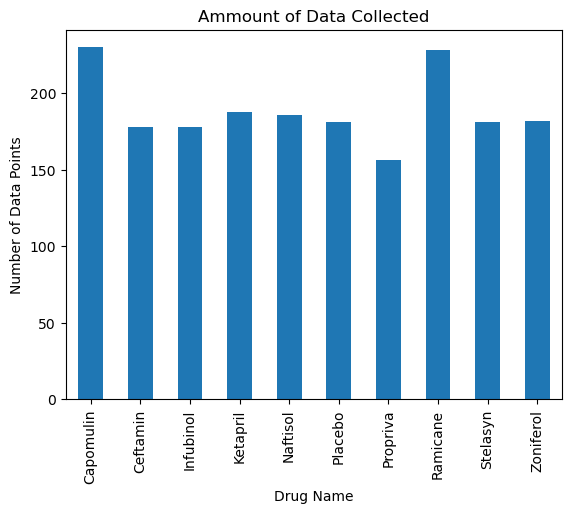

In [14]:
chart = group.plot(kind="bar", title="Ammount of Data Collected")
chart.set_xlabel("Drug Name")
chart.set_ylabel("Number of Data Points")
chart


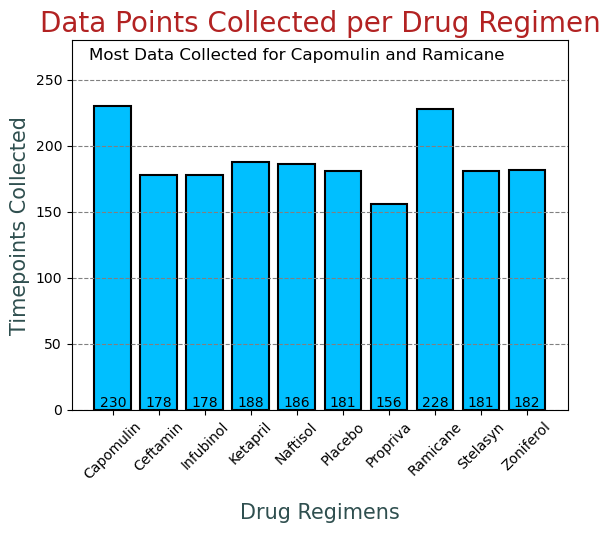

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# plt.tight_layout()
# plt.rcParams["figure.dpi"] = 360
plt.bar(group.index, group, color="deepskyblue", align="center", edgecolor='k', linewidth=1.5)
plt.xticks(rotation=45, color="k")
plt.yticks(color="k")
plt.title("Data Points Collected per Drug Regimen", fontsize=20, color='firebrick')
plt.xlabel('Drug Regimens', fontsize=15, color='darkslategray', labelpad=15)
plt.ylabel('Timepoints Collected', fontsize=15, color='darkslategray')
plt.ylim(0, max(group)+50)
plt.grid(linestyle="--", color='gray', axis="y")
plt.text(x=4, y=265, s='Most Data Collected for Capomulin and Ramicane',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=0, y=2, s="230", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=1, y=2, s="178", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=2, y=2, s="178", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=3, y=2, s="188", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=4, y=2, s="186", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=5, y=2, s="181", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=6, y=2, s="156", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=7, y=2, s="228", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=8, y=2, s="181", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.text(x=9, y=2, s="182", 
                 color='k', fontsize=10, horizontalalignment='center')
plt.show()

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice totals by gender to use in pie chart
gender = mouse_df.value_counts("Sex")
gender

Sex
Male      958
Female    930
Name: count, dtype: int64

<Axes: title={'center': 'Mice Used In Study'}>

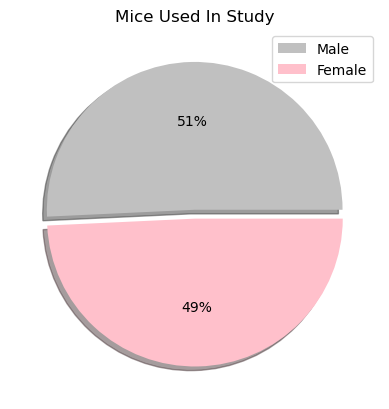

In [17]:
# Make the pie chart of mice male/female
colors = ["silver", "pink"]
explode = (0.03, 0.03) 
legend=True
gender.plot(kind='pie', autopct='%1.0f%%', title="Mice Used In Study", colors=colors, explode=explode, 
            shadow=True, legend=True, ylabel='', labeldistance=None)

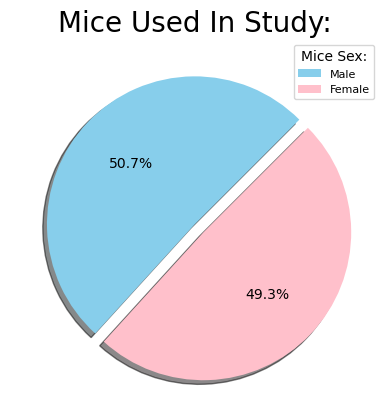

In [18]:
# Make the pie chart using pyplot
labels = ['Male', 'Female']
exploded = [0, 0.08]
plt.title("Mice Used In Study:", fontsize=20, color='k')
plt.pie(gender, colors=['skyblue', 'pink'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=None)
plt.legend(title = "Mice Sex:", fontsize=8)
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

## Get last Timepoint for each Mouse ID
# Start by getting the last (greatest) timepoint for each mouse
volume = mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
volume = volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = volume.merge(mouse_df, on = ["Mouse ID", "Timepoint"], how="left")
merged_mouse_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Sorted Tumor Volume for analysis included at top of notebook
large = merged_mouse_df.sort_values("Tumor Volume (mm3)")
large.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
97,k403,45,Ramicane,Male,21,16,22.050126,1
175,s185,45,Capomulin,Female,3,17,23.343598,1
122,m601,45,Capomulin,Male,22,17,28.430964,1
227,x401,45,Capomulin,Female,16,15,28.484033,0
70,g791,45,Ramicane,Male,11,16,29.128472,1
178,s508,45,Ramicane,Male,1,17,30.276232,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
120,m546,45,Ramicane,Male,18,16,30.564625,1
245,z578,45,Ramicane,Male,11,16,30.638696,0
193,u364,45,Capomulin,Male,18,17,31.023923,3


In [21]:
# Sorted Tumor Volume for analysis included at top of notebook
large = merged_mouse_df.sort_values("Tumor Volume (mm3)", ascending=False)
large.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
137,o331,45,Ketapril,Male,24,30,78.567014,4
113,l725,45,Naftisol,Female,8,26,76.668817,3
148,p189,45,Ketapril,Male,8,28,75.294936,4
118,m269,45,Stelasyn,Female,22,28,75.123690,1
187,t724,45,Naftisol,Female,2,25,75.113288,2
16,a818,45,Naftisol,Female,12,28,74.997764,2
73,h246,45,Ketapril,Male,13,30,74.104086,2
32,c402,45,Stelasyn,Female,1,27,74.040390,3
123,m650,45,Ketapril,Male,15,27,73.901399,4
248,z969,45,Naftisol,Male,9,30,73.867845,4


In [22]:
# List all the treatments to create the list in the next step
merged_mouse_df["Drug Regimen"].unique()


array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Infubinol', 'Ceftamin', 'Stelasyn', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
new_list = []
for treatment in treatments:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorv = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # append is adding a subset
    new_list.append(tumorv)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumorv.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumorv.loc[(tumorv < lower_bound) | (tumorv > upper_bound)]
    print(f"{treatment} outliers are equal to {outliers}")



Infubinol outliers are equal to 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)


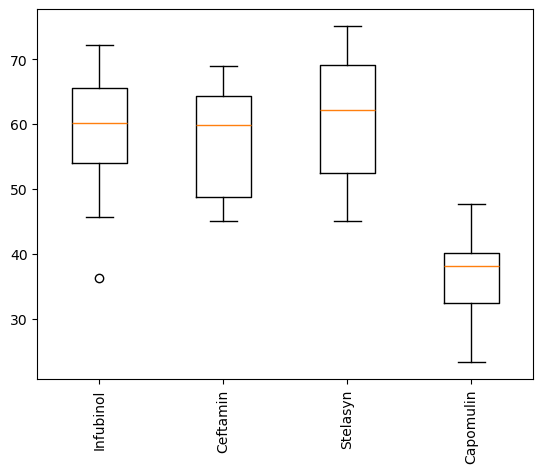

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(new_list, labels = treatments)
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
isolate = "Capomulin"

# Isolate just Mouse ID using Capumulin
isolated = mouse_df[mouse_df["Drug Regimen"] == isolate]
isolated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1831,y793,Capomulin,Male,17,17,25,38.992734,2
1832,y793,Capomulin,Male,17,17,30,35.726023,2
1833,y793,Capomulin,Male,17,17,35,36.327870,2
1834,y793,Capomulin,Male,17,17,40,31.475411,2


In [26]:
# Sorting data on Capomulin for analysis at top of notebook after noticing it, 
# and Ramicane, are most effective drug regimens
capo_sorted = isolated.sort_values("Tumor Volume (mm3)")
capo_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1392,s185,Capomulin,Female,3,17,45,23.343598,1
1391,s185,Capomulin,Female,3,17,40,25.472143,1
1728,x401,Capomulin,Female,16,15,40,28.167397,0
1390,s185,Capomulin,Female,3,17,35,28.328531,1
999,m601,Capomulin,Male,22,17,45,28.430964,1


In [27]:
# Sort Capomulin data for largest tumor volume statistics
capo_sorted = isolated.sort_values("Tumor Volume (mm3)", ascending=False)
capo_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
701,j119,Capomulin,Female,7,23,20,48.158209,1
890,l509,Capomulin,Male,17,21,20,48.070452,2
660,i557,Capomulin,Female,1,24,45,47.685963,1
889,l509,Capomulin,Male,17,21,15,47.488599,1
1354,r944,Capomulin,Male,12,25,15,47.373423,0


In [28]:
# Sorting data on Ramicane for analysis at top of notebook
isolate_ramicane = "Ramicane"

# Isolate just Mouse ID using Ramicane
isolated_ramicane = mouse_df[mouse_df["Drug Regimen"] == isolate_ramicane]
isolated_ramicane

# Sort Ramicane data for smallest tumor volume statistics
rami_sorted = isolated_ramicane.sort_values("Tumor Volume (mm3)")
rami_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
809,k403,Ramicane,Male,21,16,45,22.050126,1
808,k403,Ramicane,Male,21,16,40,24.365505,1
807,k403,Ramicane,Male,21,16,35,26.546993,1
581,g791,Ramicane,Male,11,16,45,29.128472,1
1419,s508,Ramicane,Male,1,17,45,30.276232,0


In [29]:
# Sort Ramicane data for largest tumor volume statistics
rami_sorted = isolated_ramicane.sort_values("Tumor Volume (mm3)", ascending=False)
rami_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1511,u196,Ramicane,Male,18,25,30,47.622816,2
1508,u196,Ramicane,Male,18,25,15,47.227171,1
1512,u196,Ramicane,Male,18,25,35,47.001465,2
323,c758,Ramicane,Male,9,17,15,46.940945,1
110,a644,Ramicane,Female,7,17,15,46.910892,0


In [157]:
# Sorting data on Ketapril for analysis at top of notebook
isolate_ketapril = "Ketapril"

# Isolate just Mouse ID using Ketapril
isolated_ketapril = mouse_df[mouse_df["Drug Regimen"] == isolate_ketapril]
isolated_ketapril

# Sort Ketapril data for smallest tumor volume statistics
keta_sorted = isolated_ketapril.sort_values("Tumor Volume (mm3)")
keta_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
77,a457,Ketapril,Female,11,30,0,45.0,0
494,f932,Ketapril,Male,15,29,0,45.0,0
505,g107,Ketapril,Female,2,29,0,45.0,0
543,g497,Ketapril,Male,19,28,0,45.0,0
599,h246,Ketapril,Male,13,30,0,45.0,0


In [30]:
# Sorting data on Ketapril for analysis at top of notebook
isolate_ketapril = "Ketapril"

# Isolate just Mouse ID using Ketapril
isolated_ketapril = mouse_df[mouse_df["Drug Regimen"] == isolate_ketapril]
isolated_ketapril

# Sort Ketapril data for smallest tumor volume statistics
keta_sorted = isolated_ketapril.sort_values("Tumor Volume (mm3)", ascending=False)
keta_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1103,o331,Ketapril,Male,24,30,45,78.567014,4
1180,p189,Ketapril,Male,8,28,45,75.294936,4
1179,p189,Ketapril,Male,8,28,40,74.106091,4
608,h246,Ketapril,Male,13,30,45,74.104086,2
1009,m650,Ketapril,Male,15,27,45,73.901399,4


In [31]:
# Sorting data on Naftisol for analysis at top of notebook
isolate_naftisol = "Naftisol"

# Isolate just Mouse ID using Naftisol
isolated_naftisol = mouse_df[mouse_df["Drug Regimen"] == isolate_naftisol]
isolated_naftisol

# Sort Naftisol data for smallest tumor volume statistics
naft_sorted = isolated_naftisol.sort_values("Tumor Volume (mm3)")
naft_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
144,a818,Naftisol,Female,12,28,0,45.0,0
1774,x930,Naftisol,Male,13,26,0,45.0,0
434,e584,Naftisol,Male,9,27,0,45.0,0
1719,x336,Naftisol,Female,4,29,0,45.0,0
500,f993,Naftisol,Male,21,28,0,45.0,0


In [32]:
# Sorting data on Placebo for analysis at top of notebook
isolate_placebo = "Placebo"

# Isolate just Mouse ID using Placebo
isolated_placebo = mouse_df[mouse_df["Drug Regimen"] == isolate_placebo]
isolated_placebo

# Sort Placebo data for smallest tumor volume statistics
plac_sorted = isolated_placebo.sort_values("Tumor Volume (mm3)", ascending=False)
plac_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
417,e227,Placebo,Male,1,30,45,73.212939,3
1130,o795,Placebo,Female,20,26,45,73.059454,4
163,a897,Placebo,Male,7,28,45,72.255963,4
29,a262,Placebo,Female,17,29,45,70.717621,4
416,e227,Placebo,Male,1,30,40,70.715218,3


In [33]:
# Sorting data on Naftisol for analysis at top of notebook
isolate_naftisol = "Naftisol"

# Isolate just Mouse ID using Naftisol
isolated_naftisol = mouse_df[mouse_df["Drug Regimen"] == isolate_naftisol]
isolated_naftisol

# Sort Naftisol data for smallest tumor volume statistics
naft_sorted = isolated_naftisol.sort_values("Tumor Volume (mm3)", ascending=False)
naft_sorted.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
928,l725,Naftisol,Female,8,26,45,76.668817,3
1492,t724,Naftisol,Female,2,25,45,75.113288,2
153,a818,Naftisol,Female,12,28,45,74.997764,2
1892,z969,Naftisol,Male,9,30,45,73.867845,4
927,l725,Naftisol,Female,8,26,40,73.693494,3


In [34]:
# A list of all the mice on the Capomulin drug regimen 
isolated["Mouse ID"].unique()

array(['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119',
       'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944',
       's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
       'y793'], dtype=object)

In [35]:
# Select one of the mice from the list above
f966 = isolated.loc[(mouse_df['Mouse ID'] == "f966")]
f966

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
495,f966,Capomulin,Male,16,17,0,45.000000,0
496,f966,Capomulin,Male,16,17,5,38.796474,0
497,f966,Capomulin,Male,16,17,10,35.624403,0
498,f966,Capomulin,Male,16,17,15,32.623003,0
499,f966,Capomulin,Male,16,17,20,30.485985,0


In [36]:
# Variable of Tumor Volumes for Mouse f966
f966_volume = f966["Tumor Volume (mm3)"]
f966_volume

495    45.000000
496    38.796474
497    35.624403
498    32.623003
499    30.485985
Name: Tumor Volume (mm3), dtype: float64

In [37]:
# Variable of timepoints for each tumor volume measurement for Mouse f966
f966_time = f966["Timepoint"]
f966_time

495     0
496     5
497    10
498    15
499    20
Name: Timepoint, dtype: int64

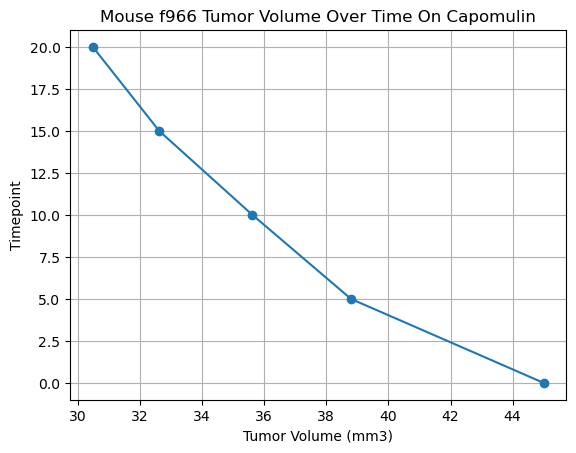

In [38]:
# Created line plot using plt
plt.title("Mouse f966 Tumor Volume Over Time On Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.plot(f966_volume, f966_time, marker="o")
plt.grid()
plt.show()

In [39]:
# Put data for mouse f966 into dramaframe to use in a panda line plot
mouse_f966 = pd.DataFrame({"Timepoint": f966_time,
                                 "Volume": f966_volume})
mouse_f966

,Timepoint,Volume
495,0,45.000000
496,5,38.796474
497,10,35.624403
498,15,32.623003
499,20,30.485985


<Axes: title={'center': 'Mouse f966 Tumor Volume Over Time On Capomulin'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

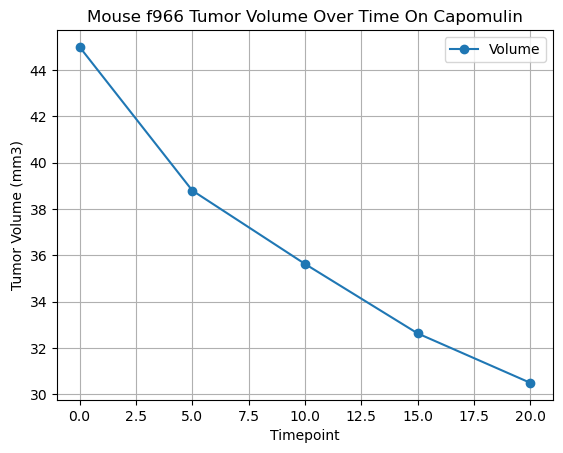

In [40]:
# Created same line plot using panda instead of plt
mouse_f966.plot("Timepoint", "Volume", grid=True, xlabel="Timepoint", marker="o", ylabel="Tumor Volume (mm3)", title="Mouse f966 Tumor Volume Over Time On Capomulin")


In [41]:
# Mean for Capomulin drug regimen gathered for scatter plot
Capomulin_Tumor_Mean = isolated.groupby(by=["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
Capomulin_Tumor_Mean


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


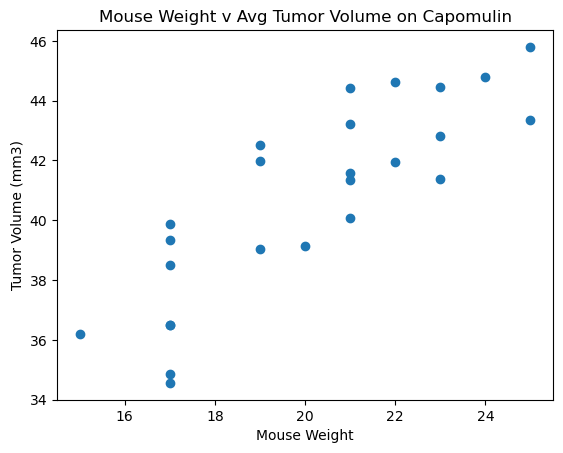

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


plt.scatter(Capomulin_Tumor_Mean["Weight (g)"], Capomulin_Tumor_Mean["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight v Avg Tumor Volume on Capomulin")
plt.show()

## Correlation and Regression

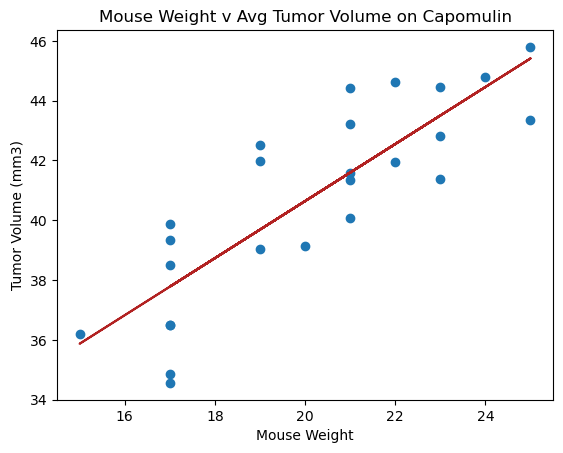

In [43]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# 0 is the start 2 is the end in scipy, telling it to cover everything
correlation_line = round(st.pearsonr(Capomulin_Tumor_Mean["Weight (g)"], Capomulin_Tumor_Mean["Tumor Volume (mm3)"])[0],2)
model = st.linregress(Capomulin_Tumor_Mean["Weight (g)"], Capomulin_Tumor_Mean["Tumor Volume (mm3)"])

# model just has two points, start and end, 0 and 1, NOT SAME AS SCIPY
values = Capomulin_Tumor_Mean["Weight (g)"]*model[0]+model[1]

plt.scatter(Capomulin_Tumor_Mean["Weight (g)"], Capomulin_Tumor_Mean["Tumor Volume (mm3)"])
plt.plot(Capomulin_Tumor_Mean["Weight (g)"], values, color="firebrick")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight v Avg Tumor Volume on Capomulin")
plt.show()
